In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os


Mounted at /content/drive/


In [ ]:
os.chdir("/content/drive/MyDrive/DS")

In [ ]:
!unzip *.zip

Archive:  archive (6).zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('day_wise.csv')
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [ ]:
dPerC = df["Deaths / 100 Cases"]

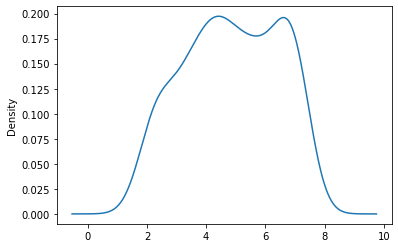

In [ ]:
dPerC.plot.kde()

In [ ]:
dPerC.describe()

count    188.000000
mean       4.860638
std        1.579541
min        2.040000
25%        3.510000
50%        4.850000
75%        6.297500
max        7.180000
Name: Deaths / 100 Cases, dtype: float64

In [ ]:
smpl = dPerC.sample(n = 10)
mean  = smpl.mean()
mean

5.126

In [ ]:
from scipy.stats import ttest_1samp
smpl = dPerC.sample(n = 10)
mean  = smpl.mean()
tset, pval = ttest_1samp(smpl.values, 4) #hypothesis mean = 4
print("p-values", pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 0.07179636392679364
we are accepting null hypothesis


In [ ]:
from scipy.stats import ttest_ind
#check whether the distribution for first week and last week are independent 
data = dPerC.values
fw = data[:7]
sw = data[-7:]

ttest,pval = ttest_ind(fw,sw)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 4.700235449546914e-09
we reject null hypothesis


In [ ]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(dPerC.sample(n = 35), x2=None, value=5)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.5794775364427713
accept null hypothesis


In [ ]:
means = []``
for i in range(30):
  means.append(dPerC.sample(30).mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


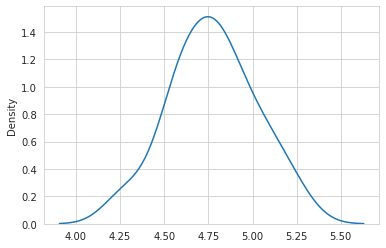

In [ ]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(means, bw=0.5)